In [1]:
import networkx as nx
import numpy as np

G = nx.Graph()

In [2]:
G.add_node(1)

In [3]:
G.add_nodes_from([2,3])
# plt.plot()
# nx.draw(G, with_labels=True, font_weight = 'bold')

In [4]:
# 이건 뭐지?
H = nx.path_graph(10)
G.add_nodes_from(H)
# plt.plot()
# nx.draw(G, with_labels=True, font_weight = 'bold')

In [5]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e) # unpack edge tuple

In [6]:
G.add_edges_from([(1,2), (1,3)])

In [7]:
G.add_edges_from(H.edges)

In [8]:
G.clear()

In [9]:
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node('SPAM') # adds node 'spam'
G.add_nodes_from('spam') # adds 4 nodes : 's' 'p' 'a' 'm'
G.add_edge(3, 'm')

In [10]:
print(G.number_of_nodes())
print(G.number_of_edges())

8
3


In [11]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))
print(G.degree[1])

[1, 2, 3, 'SPAM', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


In [12]:
# remove

G.remove_node(2)
G.remove_nodes_from('spam')
print(list(G.nodes))
G.remove_edge(1,3)
print(list(G.edges))

[1, 3, 'SPAM']
[]


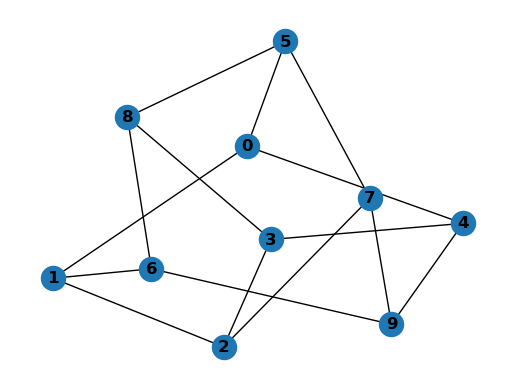

In [13]:
# Draw a graph

import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.plot()
nx.draw(G, with_labels=True, font_weight = 'bold')

In [14]:
# adding attributes to nodes and edges

In [15]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')

# plt.plot()
# nx.draw(G, with_labels=True, font_weight = 'bold')

print(G.nodes[1])
G.nodes[1]['room'] = 714
print(G.nodes.data())

{'time': '5pm'}
[(0, {}), (1, {'time': '5pm', 'room': 714}), (2, {}), (3, {'time': '2pm'}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]


[(0, 1, {}), (0, 4, {}), (0, 5, {}), (1, 2, {'weight': 4.7, 'color': 'blue'}), (1, 6, {}), (2, 3, {'weight': 8}), (2, 7, {}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 8, {}), (4, 9, {}), (4, 5, {'color': 'red'}), (5, 7, {}), (5, 8, {}), (6, 8, {}), (6, 9, {}), (7, 9, {})]


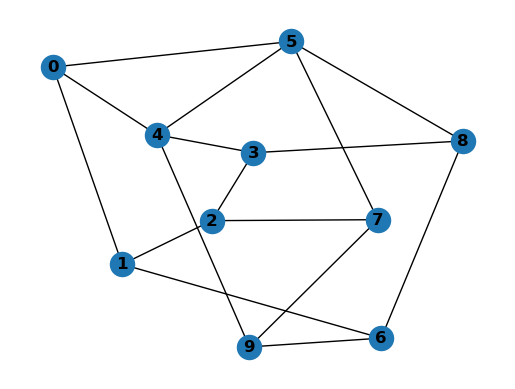

In [16]:
G.add_edge(1,2, weight=4.7)
G.add_edges_from([(3,4), (4,5)], color='red')
G.add_edges_from([(1,2, {'color' : 'blue'}), (2,3, {'weight' : 8})])
G[1][2]['weight'] = 4.7
G.edges[3,4]['weight'] = 4.2
print(G.edges.data())

plt.plot()
nx.draw(G, with_labels=True, font_weight = 'bold')

In [17]:
# Directed graphs 
# 이까지 65줄

In [18]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5),(3,1,0.75)])
print(DG.out_degree(1,weight='weight'))
print(DG.degree(1,weight='weight')) # in & out 합
print(list(DG.successors(1))) # 1 나가는 node
print(list(DG.neighbors(1)))

# if you want to convert it to UNDIRECTED graph
H = nx.Graph(DG)
print(H.degree)

0.5
1.25
[2]
[2]
[(1, 2), (2, 1), (3, 1)]


In [19]:
# Loading graphs

import pandas as pd
df = pd.read_csv("lesmis.csv")
df.head()

,Napoleon,1,Myriel,0
0,Myriel,1,Napoleon,0
1,MlleBaptistine,8,Myriel,0
2,Myriel,8,MlleBaptistine,0
3,MmeMagloire,10,Myriel,0
4,Myriel,10,MmeMagloire,0


In [20]:
# G = nx.read_edgelist("lesmis.csv", delimiter = ',')
# plt.plot()
# nx.draw_spring(G, with_labels = True, font_weight = 'bold')

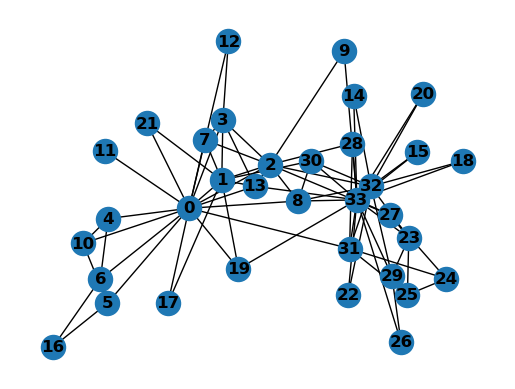

In [21]:
# generating graphs

G = nx.karate_club_graph()
plt.plot()
nx.draw_spring(G, with_labels = True, font_weight = 'bold')

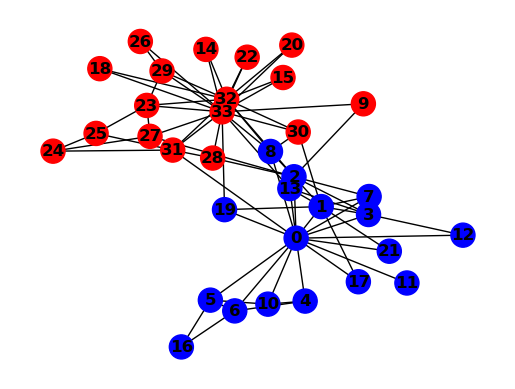

In [22]:
# Set the color of each node based on its attribute value

node_color_club = []

for node in G.nodes(data=True) :
    if 'Mr. Hi' in node[1]['club'] :
        node_color_club.append('blue')
        
    if 'Officer' in node[1]['club'] :
        node_color_club.append('red')
        
plt.plot()
nx.draw_spring(G, with_labels = True, font_weight = 'bold', node_color = node_color_club)

In [23]:
# for node in G.nodes(data = True) :
    # print(node)
    
# print(node_color_club)

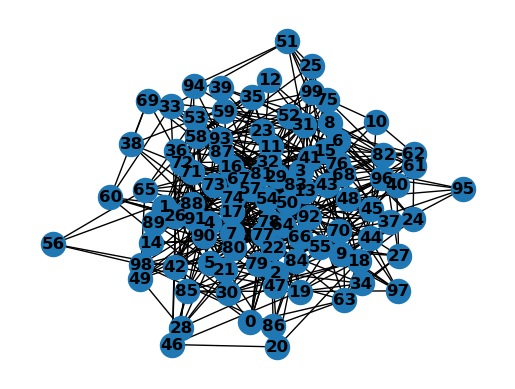

In [24]:
# create a random graph with 100 nodes
# each pair of nodes is connected with prob 0.05

G = nx.erdos_renyi_graph(100,0.1)
plt.plot()
nx.draw_spring(G, with_labels = True, font_weight = 'bold')

In [25]:
# Saving Graphs

nx.write_edgelist(G, 'random.csv', delimiter = ',')
df = pd.read_csv('random.csv')
df.head()
# 이까지 117줄

,0,22,{}
0,0,30,{}
1,0,42,{}
2,0,50,{}
3,0,63,{}
4,0,77,{}


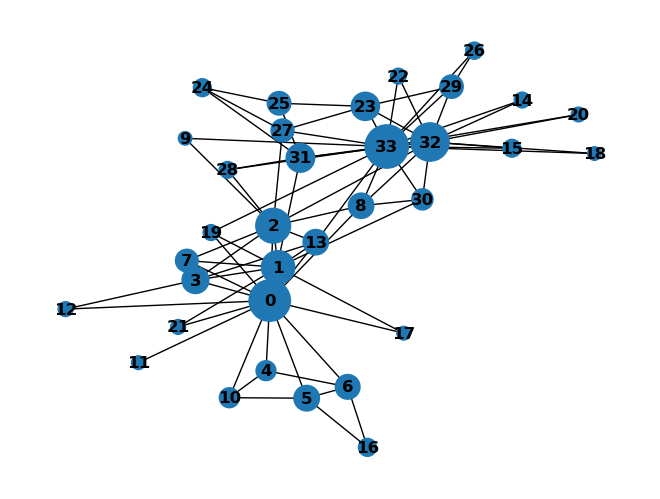

In [26]:
# PageRank

# pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

G = nx.karate_club_graph()
pr = nx.pagerank(G)

# set the size of each node proportional to its page rank
node_size = [0] * G.number_of_nodes() # node size를 0으로 초기화

index = 0
for node in G.nodes(data=True) :
    node_size[index] = pr[node[0]] * 10000;
    index += 1
    
nx.draw_spring(G, with_labels = True, font_weight = 'bold', node_size = node_size)

In [27]:
# node_size = [0] * G.number_of_nodes()
# node_size
# pr

# G = nx.karate_club_graph()
# pr = nx.pagerank(G)
# node_size = [0] * G.number_of_nodes()

# index = 0

# for node in G.nodes(data=True) :
#     print(pr[node[0]])

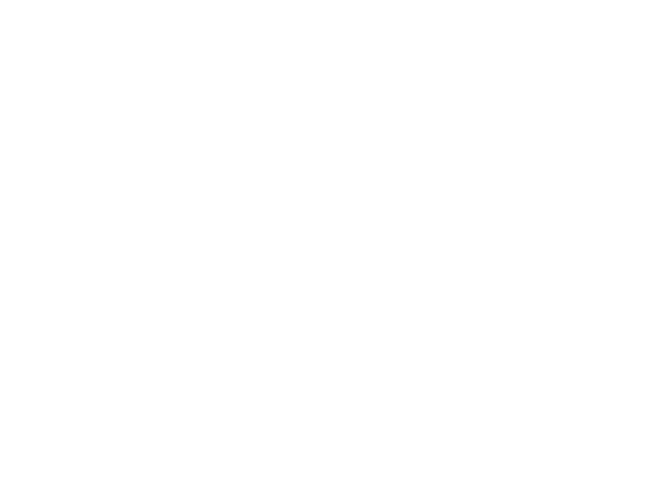

In [42]:
# 1.b Closeness Centrality

G = nx.read_edgelist("lesmis.csv", delimiter = '.')

pr = nx.closeness_centrality(G)

node_size = [0] * G.number_of_nodes()
index = 0 
for node in G.nodes(data = True) :
    node_size[index] = pr[node[0]] * 1000;
    index += 1
    
nx.draw_spring(G, with_labels = True, font_weight = 'bold', node_size = node_size)

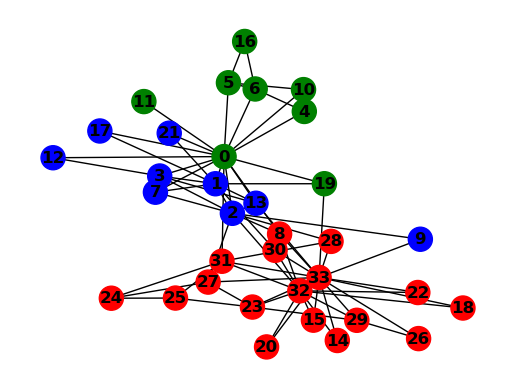

In [43]:
# 2.a Community detection : greedy

from networkx.algorithms.community import greedy_modularity_communities

np.random.seed(0)

G = nx.karate_club_graph()
communities = list(greedy_modularity_communities(G))

node_color_community = [0] * G.number_of_nodes()

colors = ['red', 'blue', 'green', 'purple']
for i in range(len(communities)) :
    for node in communities[i] :
        node_color_community[node] = colors[i];
        
plt.plot()
nx.draw_spring(G, with_labels = True, font_weight = 'bold', node_color = node_color_community)

/tmp/ipykernel_14971/1898818027.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


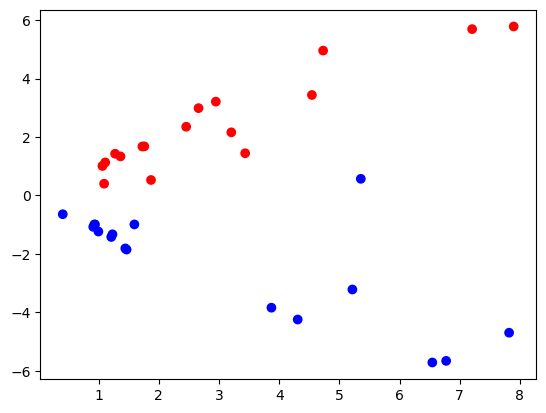

In [28]:
# 3.a Dimensionality Reduction (node embedding) : SVD

from sklearn.decomposition import TruncatedSVD

G = nx.karate_club_graph()

# obtain the adjacency matrix A of G
A = nx.adjacency_matrix(G)

# Run tuncated SVD using A with rank k
# obtain the k features of nodes that minimize the reconsturction error
svd = TruncatedSVD(n_components = 2);
X = svd.fit_transform(A);

# plot the result so that the color of each node indicates the club it belongs to
plt.scatter(X[:,0], X[:,1], c= node_color_club)

In [29]:
G.edges(0)

EdgeDataView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)])

(0, 6, {'weight': 3})

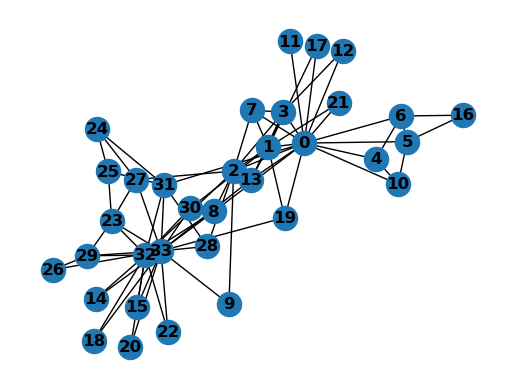

In [30]:
# 5. Link prediction
# We predict missing links using the Adamic-Adar index.
# The Adamic-Adarindex between two nodes tends to be high if the nodes are likely to be connected.

from networkx.algorithms.node_classification.lgc import local_and_global_consistency

G = nx.karate_club_graph()
plt.plot()
nx.draw_spring(G, with_labels = True, font_weight = 'bold')
edges = list(G.edges().data())
# for i in G.nodes() :
#     print(edges[i])

edges[5]

In [31]:
# remove 10 edges
edges_to_remove = set()
for i in [5,10,15,20,25,30,35,40,45,50] :
    src = edges[i][0] # 5번째, 10번쨰....50번째 edge의 0번째 element를 의미한다
    dst = edges[i][1]
    edges_to_remove.add((src,dst))
    G.remove_edge(src,dst)
    print("Edge (" + str(src) + "," + str(dst) + ") is missing!")

Edge (0,6) is missing!
Edge (0,12) is missing!
Edge (0,31) is missing!
Edge (1,17) is missing!
Edge (2,7) is missing!
Edge (2,28) is missing!
Edge (4,6) is missing!
Edge (6,16) is missing!
Edge (13,33) is missing!
Edge (18,32) is missing!


In [32]:
# compute the Adamic-Adar index of all node pairs
scores = list(nx.adamic_adar_index(G))
# scores

# compute the average score of all pairs and that of removed edges
score_sum_total = 0.0
score_sum_missing_edges = 0.0

for (src,dst,score) in scores :
    score_sum_total += score
    if (src, dst) in edges_to_remove :
        score_sum_missing_edges += score
        
# print("Average AA-index of missing edges:" + str(score_sum_missing_edges/10)
# print("Average AA-index of all pairs:" + str(score_sum_total/len(scores))

In [33]:
print(str(score_sum_missing_edges/10))
print(str(score_sum_total/len(scores)))

# Note that the missing edges tend to have higher Adamic-Adar indices than the others.

0.4180230891679247
0.27080114641501546


In [34]:
# 이제 Snap.py
# Snap.py

In [35]:
# Snap.py is a Python interface for SNAP. 
# SNAP is a general purpose, high performance system for analysis and manipulation of large networks.
# SNAP is written in C++ and optimized for maximum performance and compact graph representation.
# It easily scales to massive networks with hundreds of millions of nodes, and billions of edges.

In [36]:
# pip install snap

Note: you may need to restart the kernel to use updated packages.


In [37]:
import snap

# Graph
# TUNGraph: undirected graphs (single edge between an unordered pair of nodes)
# TNGraph: directed graphs (single directed edge between an ordered pair of nodes)

# G1 = snap.TUNGraph.New()
# G2 = snap.TNGraph.New()
# 이까지 250줄

AttributeError: module 'snap' has no attribute 'TUNGraph'